# Lab 12 Pandas & ELO rating

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 使用pandas將data存進csv範例

In [276]:

# 三个字段 name, site, age
nme = ["Google", "Runoob", "Taobao", "Wiki"]
st = ["www.google.com", "www.runoob.com", "www.taobao.com", "www.wikipedia.org"]
ag = [90, 40, 80, 98]
   
# 字典
dict = {'name': nme, 'site': st, 'age': ag}
     
df = pd.DataFrame(dict)
 
# 保存 dataframe
df.to_csv('site.csv')


## 常用的pandas functions

In [277]:
df = pd.read_csv('site.csv')

# head( n ) 方法用于读取前面的 n 行，如果不填参数 n ，默认返回 5 行。
print("==================================")
print(df.head())

# tail( n ) 方法用于读取尾部的 n 行，如果不填参数 n ，默认返回 5 行，空行各个字段的值返回 NaN。
print("==================================")
print(df.tail())

# info() 方法返回表格的一些基本信息：
print("==================================")
print(df.info())

# 显示基本统计信息
print("==================================")
print(df.describe())

# 显示数据的行数和列数
print("==================================")
print(df.shape)


'''
df.dropna() # 删除包含缺失值的行或列； https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna
df.sort_value() # 可根据指定列数据也可根据指定行的数据排序; https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
df.fillna(value) # 将缺失值替换为指定的值；
df.replace(old_value, new_value) # 将指定值替换为新值；
df.duplicated() # 检查是否有重复的数据；
df.drop_duplicates() # 删除重复的数据。
'''


   Unnamed: 0    name               site  age
0           0  Google     www.google.com   90
1           1  Runoob     www.runoob.com   40
2           2  Taobao     www.taobao.com   80
3           3    Wiki  www.wikipedia.org   98
   Unnamed: 0    name               site  age
0           0  Google     www.google.com   90
1           1  Runoob     www.runoob.com   40
2           2  Taobao     www.taobao.com   80
3           3    Wiki  www.wikipedia.org   98
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4 non-null      int64 
 1   name        4 non-null      object
 2   site        4 non-null      object
 3   age         4 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 256.0+ bytes
None
       Unnamed: 0        age
count    4.000000   4.000000
mean     1.500000  77.000000
std      1.290994  25.742313
min      0.000000  40.00

'\ndf.dropna() # 删除包含缺失值的行或列； https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna\ndf.sort_value() # 可根据指定列数据也可根据指定行的数据排序; https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html\ndf.fillna(value) # 将缺失值替换为指定的值；\ndf.replace(old_value, new_value) # 将指定值替换为新值；\ndf.duplicated() # 检查是否有重复的数据；\ndf.drop_duplicates() # 删除重复的数据。\n'

## LAB: Pandas

In [278]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

### Task:
```
Using Pandas
1. Sort out how many species is inside iris dataset.
2. Sort out how many data's "sepal length (cm)" is between 5.0~6.0.
3. Sort out how many data's "sepal length (cm)" is between 5.0~6.0 for each species.
```

In [279]:
# Task 1: Sort out how many species are inside the Iris dataset
# =============type your code below=================
species_count = 0
species_count = df['species'].nunique()
# =============type your code above=================
assert species_count == 3

# Task 2: Sort out how many data's "sepal length (cm)" is between 5.0 and 6.0
# =============type your code below=================
sepal_length_between_5_and_6 = 0
sepal_length_between_5_and_6 = df[(df['sepal length (cm)'] >= 5.0) & (df['sepal length (cm)'] <= 6.0)].shape[0]
# =============type your code above=================
assert sepal_length_between_5_and_6 == 67

# Task 3: Sort out how many data's "sepal length (cm)" is between 5.0 and 6.0 for each species
# =============type your code below=================
setosa_sepal_length_between_5_and_6 = 0
versicolor_sepal_length_between_5_and_6 = 0
virginica_sepal_length_between_5_and_6 = 0
setosa_sepal_length_between_5_and_6 = df[(df['sepal length (cm)'] >= 5.0) & (df['sepal length (cm)'] <= 6.0) & (df['species'] == 'setosa')].shape[0]
versicolor_sepal_length_between_5_and_6 = df[(df['sepal length (cm)'] >= 5.0) & (df['sepal length (cm)'] <= 6.0) & (df['species'] == 'versicolor')].shape[0]
virginica_sepal_length_between_5_and_6 = df[(df['sepal length (cm)'] >= 5.0) & (df['sepal length (cm)'] <= 6.0) & (df['species'] == 'virginica')].shape[0]
# =============type your code above=================
assert setosa_sepal_length_between_5_and_6 == 30
assert versicolor_sepal_length_between_5_and_6 == 29
assert virginica_sepal_length_between_5_and_6 == 8

## LAB: ELO Rating

### Task1: 
```
1. Use data & pandas to store and read the battle list from battles.csv
2. And pandas's functions to clean the data(there's some row data need to be clean)
```

In [280]:
data = None
# =============Type your code here================
# Load dataset
data = pd.read_csv('battles.csv')
# Clean data
data.dropna(inplace=True)
# =============Type your code here================

assert data is not None

# Extract relevant columns
matches = data[['player1', 'player2', 'player1_score', 'player2_score']]

# Initialize ratings
ratings = {}

In [281]:
def get_rating(player):
    if player not in ratings:
        ratings[player] = 1000
    return ratings[player]

def expected_score(rating_a, rating_b):
    return 1 / (1 + 10 ** ((rating_b - rating_a) / 400))

def update_rating(old_rating, actual_score, expected_score, k=500):
    return old_rating + k * (actual_score - expected_score)

### Task2:
```
1. Use pandas to transform ratings from Dict to pandas.DataFrame and use ratings_df to store it.
   Also make the columns=['Player', 'Rating'].
2. And using pandas's function to sort players depend on their "Rating" from high to low.
```
In the end you should see:

<img src="final_output.png" width="500px">

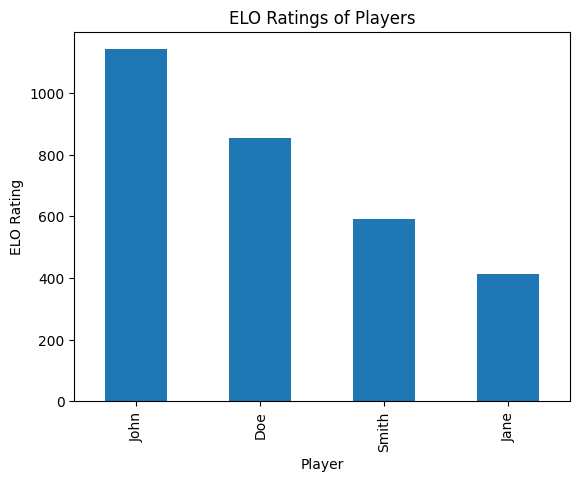

In [282]:
# Apply ELO calculations
for index, row in matches.iterrows():
    player1 = row['player1']
    player2 = row['player2']
    score1 = row['player1_score']
    score2 = row['player2_score']

    rating1 = get_rating(player1)
    rating2 = get_rating(player2)

    expected1 = expected_score(rating1, rating2)
    expected2 = expected_score(rating2, rating1)

    new_rating1 = update_rating(rating1, score1, expected1)
    new_rating2 = update_rating(rating2, score2, expected2)

    ratings[player1] = new_rating1
    ratings[player2] = new_rating2
# ======================================================================================

ratings_df = pd.DataFrame(columns=['Player', 'Rating'])
# =============Type your code here================
# Convert ratings to DataFrame
ratings_df = pd.DataFrame(list(ratings.items()), columns=['Player', 'Rating'])
ratings_df = ratings_df.sort_values(by='Rating', ascending=False)
# =============Type your code here================


expected_order = ['John', 'Doe', 'Smith', 'Jane']
actual_order = ratings_df['Player'].tolist()
# Plot ratings
ratings_df.plot(kind='bar', x='Player', y='Rating', legend=False)
plt.xlabel('Player')
plt.ylabel('ELO Rating')
plt.title('ELO Ratings of Players')
plt.show()
assert actual_order == expected_order, f"Expected order is {expected_order}, but got {actual_order}"